In [1]:
!nvidia-smi

Fri Mar 10 11:17:31 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P0    23W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!git clone https://github.com/iteam1/anomal.git

Cloning into 'anomal'...
remote: Enumerating objects: 1147, done.
remote: Counting objects: 100% (149/149), done.
remote: Compressing objects: 100% (110/110), done.
remote: Total 1147 (delta 72), reused 110 (delta 37), pack-reused 998
Receiving objects: 100% (1147/1147), 75.92 MiB | 38.93 MiB/s, done.
Resolving deltas: 100% (453/453), done.


In [4]:
!unzip /content/drive/MyDrive/datasets.zip -d /content/anomal

Archive:  /content/drive/MyDrive/datasets.zip
   creating: /content/anomal/datasets/
   creating: /content/anomal/datasets/hazelnut_toy/
  inflating: /content/anomal/datasets/hazelnut_toy/LICENSE  
   creating: /content/anomal/datasets/hazelnut_toy/test/
   creating: /content/anomal/datasets/hazelnut_toy/test/crack/
  inflating: /content/anomal/datasets/hazelnut_toy/test/crack/004.png  
  inflating: /content/anomal/datasets/hazelnut_toy/test/crack/003.png  
  inflating: /content/anomal/datasets/hazelnut_toy/test/crack/001.png  
  inflating: /content/anomal/datasets/hazelnut_toy/test/crack/005.png  
  inflating: /content/anomal/datasets/hazelnut_toy/test/crack/002.png  
   creating: /content/anomal/datasets/hazelnut_toy/test/colour/
  inflating: /content/anomal/datasets/hazelnut_toy/test/colour/016.png  
  inflating: /content/anomal/datasets/hazelnut_toy/test/colour/013.png  
  inflating: /content/anomal/datasets/hazelnut_toy/test/colour/000.png  
  inflating: /content/anomal/datasets/h

In [5]:
import tensorflow as tf

In [6]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [7]:
%cd anomal

/content/anomal


In [8]:
!sudo rm -rf /content/anomal/model

In [12]:
!python3 unet/train.py

2023-03-10 11:20:38.816907: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.9/dist-packages/cv2/../../lib64:/usr/lib64-nvidia
2023-03-10 11:20:38.817023: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.9/dist-packages/cv2/../../lib64:/usr/lib64-nvidia
2023-03-10 11:20:38.817042: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.
Num GPUs Available:  1
2023-03-10 11:20:41.000693: W tens

In [15]:
!cp /content/anomal/model/unet/model.hdf5 -r /content/drive/MyDrive

In [16]:
#!python3 unet/test.py

In [17]:
from keras.models import load_model
from tensorflow.keras.utils import load_img,img_to_array
import numpy as np
import cv2
import tensorflow as tf
from google.colab.patches import cv2_imshow
import os
import random

In [18]:
model_dir = "model/unet/model.hdf5"

In [19]:
trained_model = load_model(model_dir)
trained_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 64  640         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 256, 256, 64  36928       ['conv2d[0][0]']                 
                                )                                                             

In [20]:
# compile loaded model
trained_model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

128
(1, 256, 256)
1/1 [==============================] - 0s 22ms/step
(256, 256) 0 255


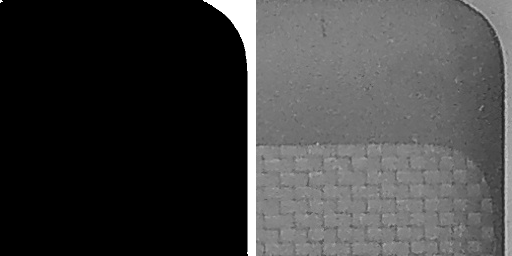

In [47]:
DIM = 256
src = '/content/anomal/datasets/unet/train/image'
images= os.listdir(src)
print(len(images))

# predicting images
image = random.choice(images)
path = os.path.join(src,image)
img = cv2.imread(path,0)
img = img.astype('float32')
x = np.expand_dims(img, axis=0)
print(x.shape)

pred = trained_model.predict([x])
pred = pred.reshape(pred.shape[1],pred.shape[2])
pred = pred * 255
pred = pred.astype('uint8')
print(pred.shape,pred.min(),pred.max())

out = np.hstack([pred,img])
cv2_imshow(out)

128
(1, 256, 256)
1/1 [==============================] - 0s 23ms/step
(256, 256) 0 255


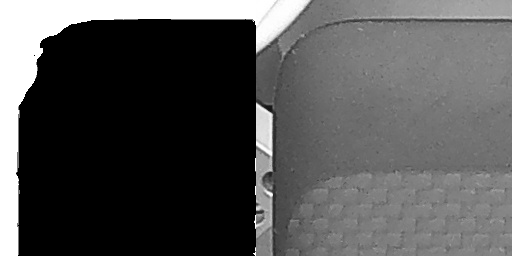

In [54]:
DIM = 256
src = '/content/anomal/datasets/unet/train/image'
images= os.listdir(src)
print(len(images))

# predicting images
image = random.choice(images)
path = os.path.join(src,image)
img = cv2.imread(path,0)
img = img.astype('float32')
x = np.expand_dims(img, axis=0)
print(x.shape)

pred = trained_model.predict([x])
pred = pred.reshape(pred.shape[1],pred.shape[2])
pred = pred * 255
pred = pred.astype('uint8')
print(pred.shape,pred.min(),pred.max())

out = np.hstack([pred,img])
cv2_imshow(out)

128
(1, 256, 256)
1/1 [==============================] - 0s 24ms/step
(256, 256) 0 255


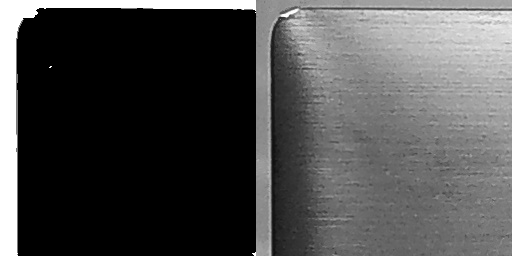

In [23]:
DIM = 256
src = '/content/anomal/datasets/unet/train/image'
images= os.listdir(src)
print(len(images))

# predicting images
image = random.choice(images)
path = os.path.join(src,image)
img = cv2.imread(path,0)
img = img.astype('float32')
x = np.expand_dims(img, axis=0)
print(x.shape)

pred = trained_model.predict([x])
pred = pred.reshape(pred.shape[1],pred.shape[2])
pred = pred * 255
pred = pred.astype('uint8')
print(pred.shape,pred.min(),pred.max())

out = np.hstack([pred,img])
cv2_imshow(out)

128
(1, 256, 256)
1/1 [==============================] - 0s 21ms/step
(256, 256) 0 255


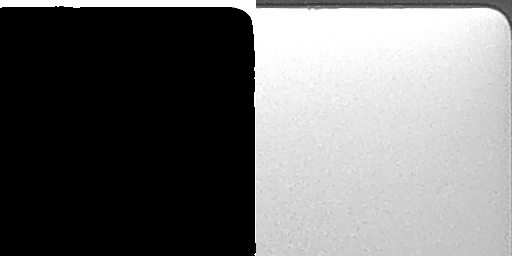

In [25]:
DIM = 256
src = '/content/anomal/datasets/unet/train/image'
images= os.listdir(src)
print(len(images))

# predicting images
image = random.choice(images)
path = os.path.join(src,image)
img = cv2.imread(path,0)
img = img.astype('float32')
x = np.expand_dims(img, axis=0)
print(x.shape)

pred = trained_model.predict([x])
pred = pred.reshape(pred.shape[1],pred.shape[2])
pred = pred * 255
pred = pred.astype('uint8')
print(pred.shape,pred.min(),pred.max())

out = np.hstack([pred,img])
cv2_imshow(out)

128
(1, 256, 256)
1/1 [==============================] - 0s 23ms/step
(256, 256) 0 255


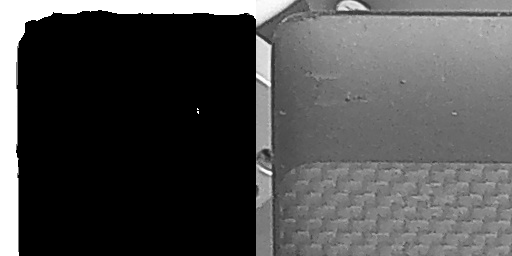

In [26]:
DIM = 256
src = '/content/anomal/datasets/unet/train/image'
images= os.listdir(src)
print(len(images))

# predicting images
image = random.choice(images)
path = os.path.join(src,image)
img = cv2.imread(path,0)
img = img.astype('float32')
x = np.expand_dims(img, axis=0)
print(x.shape)

pred = trained_model.predict([x])
pred = pred.reshape(pred.shape[1],pred.shape[2])
pred = pred * 255
pred = pred.astype('uint8')
print(pred.shape,pred.min(),pred.max())

out = np.hstack([pred,img])
cv2_imshow(out)

128
(1, 256, 256)
1/1 [==============================] - 0s 22ms/step
(256, 256) 0 255


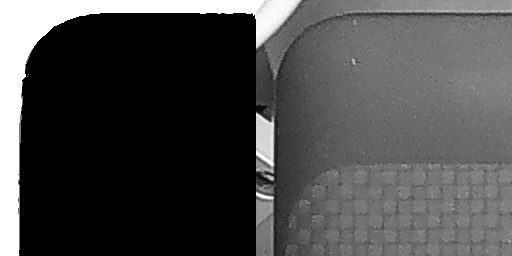

In [40]:
DIM = 256
src = '/content/anomal/datasets/unet/train/image'
images= os.listdir(src)
print(len(images))

# predicting images
image = random.choice(images)
path = os.path.join(src,image)
img = cv2.imread(path,0)
img = img.astype('float32')
x = np.expand_dims(img, axis=0)
print(x.shape)

pred = trained_model.predict([x])
pred = pred.reshape(pred.shape[1],pred.shape[2])
pred = pred * 255
pred = pred.astype('uint8')
print(pred.shape,pred.min(),pred.max())

out = np.hstack([pred,img])
cv2_imshow(out)